In [312]:
%run model_analysis.py

Importing argparse
Importing keras model (from json)
Importing numpy
-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Parsing command line arguments.


In [313]:
from pandas import DataFrame

In [314]:
from consistent_plots import hist
import matplotlib.pyplot as plt

In [315]:
nevents = len(np.concatenate((f['test'], f['train'], f['val'])))
ntest = len(f['test'])

In [316]:
evt_label = np.repeat(np.arange(0,ntest),15)
data = np.hstack((f['X_test'], f['y_test'][:,np.newaxis], scores[:,1][:,np.newaxis]))
cols = ['b1 pt', 'b1 eta', 'b1 phi', 'b2 pt', 'b2 eta', 'b2 phi', 'Delta R', 'target', 'score']

In [317]:
data_dict = {}
for i in range(data.shape[1]):
    data_dict[cols[i]] = data[:,i]
data_dict['label'] = f['test_pair_label']
data_dict['event'] = evt_label

In [318]:
test_df = DataFrame(data_dict)
test_df.head()

,b1 pt,b1 eta,b1 phi,b2 pt,b2 eta,b2 phi,Delta R,target,score,label,event
0,139.3750,-0.169098,0.863037,71.1250,0.633789,1.867676,1.286051,1.0,0.986,HX,0
1,90.1875,1.835449,-1.035645,39.4375,0.373291,-1.527344,1.542619,1.0,0.933,HY1,0
2,110.0000,-0.409363,-1.858887,79.2500,0.166534,3.075684,1.466431,1.0,0.954,HY2,0
3,139.3750,-0.169098,0.863037,90.1875,1.835449,-1.035645,2.761014,0.0,0.001,"X b1, Y1 b1",0
4,139.3750,-0.169098,0.863037,39.4375,0.373291,-1.527344,2.451144,0.0,0.778,"X b1, Y1 b2",0


In [321]:
test_df.where(test_df['score'] == 0)

,b1 pt,b1 eta,b1 phi,b2 pt,b2 eta,b2 phi,Delta R,target,score,label,event
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
75580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75581,44.0,-2.124512,1.889893,120.3125,-0.005495,1.334473,2.190599,0.0,0.0,"Y1 b1, Y2 b1",5038.0
75582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
sorted_pairs = np.argsort(events[0])[::-1]
sorted_scores = np.sort(events[0])[::-1]

for i,evt_scores in enumerate(events):
    if i == 0: continue
    sp = np.argsort(evt_scores)[::-1]
    sorted_pairs = np.vstack((sorted_pairs, sp))
    sorted_scores = np.vstack((sorted_scores, np.sort(evt_scores)[::-1]))

In [320]:
pair_names = ['HX',
 'HY1',
 'HY2',
 'X b1, Y1 b1',
 'X b1, Y1 b2',
 'X b1, Y2 b1',
 'X b1, Y2 b2',
 'X b2, Y1 b1',
 'X b2, Y1 b2',
 'X b2, Y2 b1',
 'X b2, Y2 b2',
 'Y1 b1, Y2 b1',
 'Y1 b1, Y2 b2',
 'Y1 b2, Y2 b1',
 'Y1 b2, Y2 b2']

In [265]:
from matplotlib.ticker import MultipleLocator, FixedLocator
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

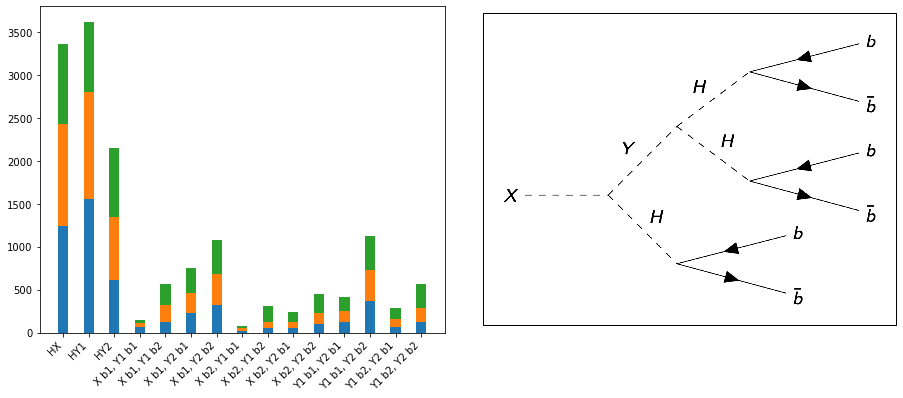

In [311]:
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(right=0.5)
n, bins, _ = plt.hist([sorted_pairs[:,i] for i in range(3)], stacked=True, bins=np.arange(16), rwidth=0.4, align='left')
ax.xaxis.set_major_locator(FixedLocator(np.arange(15)))
ax.set_xticklabels(pair_names, rotation=45, ha='right')
image = Image.open('CascadeDecay.png')
im = OffsetImage(image, zoom=0.40)
ab = AnnotationBbox(im, (1.6,0.5), xycoords=ax.transAxes, boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab)
plt.show()

In [85]:
pair_breakdown = [sorted_pairs[:,i]]

In [100]:
max_pair = [np.sum(pair_breakdown[0] == i) for i in range(15)]
max_pair

[1241, 1551, 610, 67, 124, 224, 326, 20, 52, 51, 95, 128, 369, 61, 120]

In [103]:
not_HX = pair_breakdown[0] != 0
not_HY1 = pair_breakdown[0] != 1
not_HY2 = pair_breakdown[0] != 2

non_Higgs_max = not_HX & not_HY1 & not_HY2

In [132]:
f['test_label'][np.repeat(non_Higgs_max,15)]

array(['Higgs', 'Higgs', 'Higgs', ..., 'Non-Higgs', 'Non-Higgs',
       'Non-Higgs'], dtype='<U32')

In [118]:
test_evts_nHmax = f['test']

In [115]:
f['test'].shape

(5039,)

In [116]:
X_test_flat = f['X_test'].reshape(5039, 15*7)

In [122]:
X_test_flat.shape

(5039, 105)

In [123]:
events_with_nonHiggs_as_max = X_test_flat[non_Higgs_max]

In [126]:
ntest_nonHiggsMax = events_with_nonHiggs_as_max.shape[0]

In [128]:
events_with_nonHiggs_as_max =  events_with_nonHiggs_as_max.reshape(ntest_nonHiggsMax*15, 7)

In [129]:
events_with_nonHiggs_as_max.shape

(24555, 7)

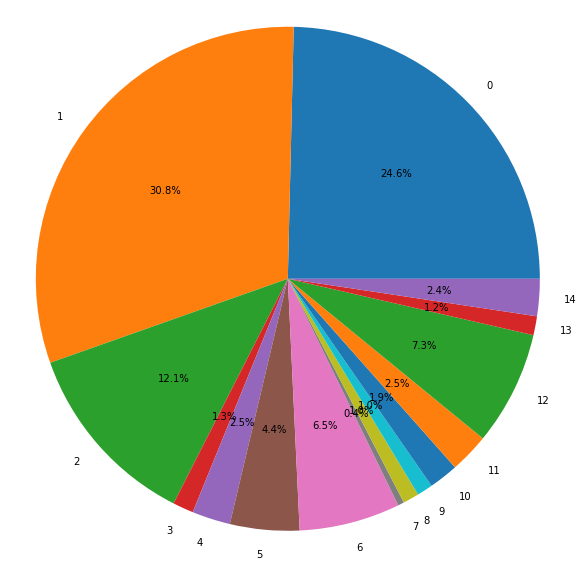

In [99]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(max_pair, labels=np.arange(0,15,1), autopct='%1.1f%%',
        shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

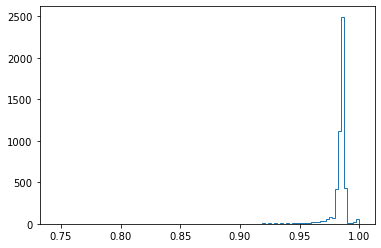

In [82]:
fig, ax = plt.subplots()
n, bins, patches = hist(ax, sorted_scores[:,0])